<a href="https://colab.research.google.com/github/andrecianflone/policy_value_iteration/blob/master/Policy_Value_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Policy Iteration
The state-value function for any given policy $\pi$ can be evaluated as:
$$
\newcommand{\given}{|}
\newcommand{\states}{S}
\newcommand{\E}{\mathbb{E}}
\newcommand{\actions}{A}
\newcommand{\argmax}{\text{argmax}}
\newcommand{\R}{\mathbb{R}}
V_\pi (s) = \sum_a \pi(a\given s) \left[r(s,a) + \gamma P(s^\prime \given s,a) V_\pi (s^\prime)\right]
$$

for all $s \in \states$

Equivalently, we can write the above as a function of state-action values:

$$
V_\pi (s) = \sum_a \pi(a \given s) q_\pi(s,a)
$$

Which must be less than or equal to the max q-value:

$$
V_\pi (s) = \sum_a \pi(a \given s) q_\pi(s,a) \leq \max_a q_\pi(s,a)
$$

We perform a policy step improvement to get new policy $\pi^\prime$:

$$
\pi^\prime(a|s) = \argmax_a q_\pi (s,a)
$$

Then the following is true:

$$
V_\pi (s) = \sum_a \pi(a \given s) q_\pi(s,a) \leq \sum_a \pi^\prime(a \given s) q_\pi(s,a)
$$

And if we improve again:

$$
\pi^{\prime\prime} = (a|s) = \argmax_a q_{\pi^\prime} (s,a)
$$

Then the following is also true:

$$
V_\pi (s) = \sum_a \pi(a \given s) q_\pi(s,a) \leq \sum_a \pi^\prime(a \given s) q_\pi(s,a) \leq \sum_a \pi^{\prime\prime}(a \given s) q_{\pi^\prime}(s,a)
$$

And so on for all $s\in \states$. Since every application of policy iteration must result in a better policy, as evaluated by the value function, successive policies are nondecreasing. And, since the MDP is finite, therefore there is a finite set of policies, policy iteration *must* terminate. If such new policy results in state values equal to the states values under the previous policy, then the optimal policy must have been found.

# Track 1: Policy Iteration and Value Iteration


# Policy Iteration
Policy iteration alternates between evaluating a policy and improving a policy. Policy evaluation is defined as the expected future reward, defined as the expectation for the infinite sum of discounted rewards:



$$
\begin{aligned}
    v_\pi(s) &= \E_\pi\left[ \sum_{t=0}^\infty \gamma^t r(S_t, A_t) \given S_0 = s\right] \\
    &=\E_\pi\left[ r(S_0, A_0) + \sum_{t=1}^\infty \gamma^t r(S_t, A_t) \given S_0 = s\right] \\
    &=\E_\pi\left[ r(S_0, A_0) + \sum_{t=0}^\infty \gamma^{t+1} r(S_{t+1}, A_{t+1}) \given S_0 = s\right] \\
    &=\E_\pi\left[ r(S_0, A_0) + \gamma \sum_{t=0}^\infty \gamma^{t} r(S_{t+1}, A_{t+1}) \given S_0 = s\right] \\    
    &=\E_\pi\left[ r(S_0, A_0) + \gamma v_\pi(S_1) \given S_0 = s\right] \\  
\end{aligned}
$$

Replacing the definition of the expectation with policy $\pi$ and transition probability matrix $P$, we get:
$$
v_\pi(s) = \sum_{a \in \actions} \pi\left(a \given s\right)\left( r(s, a) + \gamma \sum_{s'} P\left(s' \given s, a\right) v_\pi(s')\right)
$$

Note this definition is slightly different, but equivalent to the notation in S&B, page 58:

$$
\begin{aligned}
v_\pi (s) &= \E_\pi \left[ G_t \given S_t = s\right]\\
&= \E_\pi \left[ R_{t+1} + \gamma G_{t+1} \given S_t = s\right]\\
&= \E_\pi \left[ R_{t+1} + \gamma v_\pi ( S_{t+1}) \mid S_t = s \right]\\
&= \sum_a \pi(a|s) \sum_{s^\prime, r} p(s^\prime, r \mid s,a) \left[r + \gamma v_\pi (s^\prime)\right]
\end{aligned}
$$

The pseudo code uses the latter notation, but we implement the algorithm with the former notation.

We implement policy evaluation in matrix form. To do so, we define the following:

$$
\begin{align*}
    r_\pi(s) \defeq \sum_{a} \pi\left(a \given s\right) r(s,a) \hspace{2em}P_\pi(s, s') \defeq \sum_{a} \pi\left(a \given s\right) P\left(s' \given s, a\right)\enspace ,
\end{align*}
$$

where $r_\pi \in \R^{|\states|}$, $P_\pi \in \R^{|\states|\times|\states|}, v_\pi \in \R^{\states}$. In this form, $v_\pi$ is defined as:
$$
v_\pi = r_\pi + \gamma P_\pi v_\pi
$$

Since we are solving for $v_\pi$ iteratively, as opposed to closed form, we must keep track of our changing policy, and stationary reward functions. These are represented as matrices, where $\pi(a \given s) \in \R^{|\states| \times|\actions|}$ and $r(s,a) \in \R^{|\states| \times |\actions|}$.

Pseudo code for policy iteration, which includes policy evaluation and improvement, from S&B p.63

![policy iteration](https://image.ibb.co/daZKdm/policy_iteration.png)



## Policy and Value Iteration


$$
\def\E{\mathbb{E}}
\def\R{\mathbb{R}}
\def\given{\mid}
\def\actions{\mathcal{A}}
\def\states{\mathcal{S}}
\def\defeq{\dot=}
\def\argmax{\text{argmax}}
$$

## Bellman Optimality Equation
The Bellman Optimality Equation is defined as:

$$
V_* = \max_a [r(s,a) + \gamma \sum_{s^\prime} P(s^\prime \given s,a) V_* (s^\prime)]
$$

For each step $k$, The Bellman Optimality Operator updates an estimate of $V_*$, that is $V_{k+1}$ based on previous estimate $V_{k}$:

$$
V_{k+1} = \max_a [r(s,a) + \gamma \sum_{s^\prime} P(s^\prime \given s,a) V_k (s^\prime)]
$$

Let the error in our estimate be defined as the absolute distance between the estimate and the true value:

$$
\epsilon_{k} = \mid V_k - V_*|
$$

In the worst case, our error is upper bounded by the infinity norm:

$$
\lVert V_k - V_* \rVert_\infty = \max_s\left| V_k (s) - V_*(s) \right|
$$

Using these equations, let's apply the Bellman Optimality operator and show that with our error function it is a contraction operator:

$$
\begin{aligned}
V_{k+1} - V_* &= \left| \max_a \left[r(s,a) + \gamma \sum_{s^\prime}P(s^\prime \given s,a)V_k(s^\prime)\right] - \max_a \left[r(s,a) + \gamma \sum_{s^\prime}P(s^\prime \given s,a)V_*(s^\prime)\right] \right| \\
&\leq \max_a\left|  r(s,a) + \gamma \sum_{s^\prime}P(s^\prime \given s,a)V_k(s^\prime) - r(s,a) + \gamma \sum_{s^\prime}P(s^\prime \given s,a)V_*(s^\prime)\right| \\
&= \max_a\left|\gamma \sum_{s^\prime}P(s^\prime \given s,a)V_k(s^\prime) -  \gamma \sum_{s^\prime}P(s^\prime \given s,a)V_*(s^\prime)\right| \\
&= \gamma \max_a\left|\sum_{s^\prime}P(s^\prime \given s,a)\left[V_k(s^\prime) - V_*(s^\prime)\right]\right| \\
&\leq \gamma \max_a\left|\max_{s}\left[V_k(s) - V_*(s)\right]\right| \\
&= \gamma \max_{s}\left|V_k(s) - V_*(s)\right| \\
&= \gamma \lVert V_k - V_* \rVert_\infty
\end{aligned}
$$

Since applying one iteration of the operator must result in a decreasing error for all states $s \in \states$, with error equal to zero in the limit, the Bellman optimality operator is a contraction mapping.  


# Value Iteration
One downside to policy iteration, which is clear from the pseudo code, is that after every stage of policy improvement we must re-evaluate our policy in a full sweep. We can combine policy improvement and evaluation into *value iteration*. For all $s \in \states$, value iteration is defined by the update rule:

$$
\begin{aligned}
v_{k+1}(s) \defeq &\max_a \E \left[R_{t+1} + \gamma v_k (S_{t+1}) \given S_t = s, A_t = a\right]\\
= &\max_a \sum_{s^\prime, r} p(s^\prime, r \given s, a)[r+ \gamma v_k (s^\prime)]
\end{aligned}
$$

After convergence, the optimal policy is derived from the state values, for all $s \in \states$:

$$
\pi (s) = \argmax_a \sum_{s^\prime, r} p(s^\prime, r \given s, a) [r + \gamma v(s)]
$$

Pseudo code for value iteration from S&B p.65
![value iteration](https://image.ibb.co/jLMfTx/Screen_Shot_2018_02_04_at_9_42_07_PM.png)

# Implementation

### Einstein Notation
**Note on implementation**: The class `MDPAgent` implements two algorithms: policy iteration and value iteration. In both cases, the algorithms are implemented in matrix form, specifically using [Einstein summation convention](https://en.wikipedia.org/wiki/Einstein_notation) with the help of `numpy.einsum`. This notation is used to make the code more succinct and computationally efficient. If you are unfamiliar with Einstein notation, continue reading, otherwise skip to the section **MDP Agent**. Consider the following common operation. Given the 3-d array $A \in \R^{4 \times 3 \times 4}$, and vector $b \in \R^4$, we wish to compute the element-wise product of $A$ and $b$, with $b$ broadcast in the second and third dimension, followed by a summation over the second and third dimension resulting in vector $c \in \R^4$. This can be accomplished in `Numpy` the following way:



In [0]:
import numpy as np
a = np.random.randint(0,5,(3,2,2))
b = np.random.randint(0,5,3)

c = a*b[:, None, None] # explicit broadcasting
c = np.sum(c, axis=2) # sum 3rd dimension
c = np.sum(c, axis=1) # sum 2nd

print(c)

[10 32 24]


The first issue is that the equation must be split into multiple lines. Secondly, Python creates temporary arrays, requiring more memory than necessary. We can compute the three lines above with a single function:

In [0]:
c = np.einsum('ijk, i->i',a,b)

print(c)

[32 12  8]


The operation is interpreted by the string argument. The first part, `ijk, i` labels the dimensions of the arrays `a` and `b` respectively. Array `b` has a single dimension, which is identified as `i`, meaning it matches the orientation of dimension `i` of array `a`. Since `b` is a vector, it must be multiplied by broadcasting to match the shape of `a`. The second part of the string, `->i`, tells `numpy` which dimension to return, and therefore how to sum along axes. If we write `->ij`, `numpy` returns a matrix matching the first two dimensions of `a`, and so must sum along dimension `k`. Since we wrote `->i`, `numpy` must sum along dimension `j` and `k`. Einstein notation can be used for dot-products or element-wise multiplication with broadcasting and summation, all in a single numpy function. See [`numpy.einsum`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.einsum.html) documentation for more details.

## MDP Agent
The `MDPAgent` class implements both policy iteration (class method `policy_iteration`) and value iteration (class method `value_iteration`). In the policy iteration case, the policy can be evaluated in closed form with a matrix inverse (class method `_policy_evaluation_exact`) or by iteration until convergence (class method `_policy_evaluation_modified`). Please read comments in the code for details of each function.

In [0]:
import numpy as np
from numpy.linalg import inv
from pdb import set_trace
import numpy.ma as ma
!pip install PTable
from prettytable import PrettyTable, ALL
from datetime import datetime
import matplotlib.pyplot as plt

def table_print(arr, headers="",decimals=6):
  x = PrettyTable()
  x.field_names = headers
  a = np.around(arr, decimals)
  rows = a.shape[0]
  if rows > 1 and a.ndim > 1:
    for i in range(rows):
      x.add_row([i, *a[i]])
  else:
    x.add_row(arr)
  print(x)
  
def print_values(v,decimals):
  table_print(np.expand_dims(v,1), headers=["states", "values"],decimals=decimals)
  
def print_policy(pi, decimals):
  headers = ["states"]
  #set_trace()
  for i in range(pi.shape[1]):
     headers.append("action " + str(i))
  table_print(pi, headers=headers, decimals=decimals)


  Running setup.py bdist_wheel for PTable ... - done
  Stored in directory: /root/.cache/pip/wheels/22/cc/2e/55980bfe86393df3e9896146a01f6802978d09d7ebcba5ea56
Successfully built PTable


In [0]:
class MDPAgent():
  def __init__(self, gamma):
    """
    Basic MDP agent, can do policy iteration and value iteration
    """
    self.gamma = gamma # discount rate
    self.theta = 0.000001 # convergence threshold

  def _initialize_deterministic(self, p, n_states, n_actions):
    """ Initial policy """
    # Random deterministic policy, array of shape |S| x |A|
    r_actions = np.random.randint(0,n_actions,n_states)
    pi = np.zeros((r_actions.size, n_actions))
    pi[np.arange(r_actions.size), r_actions] = 1
    return pi

  def _initialize_uniform(self, p, n_states, n_actions):
    """ Initial policy """
    # Begin with uniform policy: array of shape |S| x |A|
    pi = np.full((n_states, n_actions), 1)
    pi = pi*np.sum(p, axis=2) # remove invalid actions
    base = np.sum(pi, axis=1) # get number of valid actions per state
    np.seterr(divide='ignore')
    pi = np.nan_to_num(pi/base[:,None]) # divide by number of actions, broadcast
    #np.seterr(divide='raise')
    return pi

  def _policy_evaluation_exact(self, pi, v, r, p):
    """
    Evaluate policy by taking the inverse
    Args:
      pi: policy, array of shape |S| x |A|
      r: rewards, array of shape |S| x |A|
      p: state transition probabilities, array of shape |S| x |A| x |S|
    Return:
      v: 1D array with updated state values
    """
    # Rewards according to policy: Hadamard product and row-wise sum
    r_pi = np.einsum('ij,ij->i', pi, r)

    # Policy-weighted transitions:
    # multiply p by pi by broadcasting pi, then sum second axis
    # result is an array of shape |S| x |S|
    p_pi = np.einsum('ijk, ij->ik', p, pi)
    v = np.dot(inv((np.eye(p_pi.shape[0]) - self.gamma*p_pi)), r_pi)
    return v
  
  
  def _policy_evaluation_modified(self, pi, v, r, p):
    """
    Evaluate pi using an initial v estimate and iterate
    Args:
      pi: policy, array of shape |S| x |A|
      v: state values, array of shape |S|
      r: rewards, array of shape |S| x |A|
      p: state transition probabilities, array of shape |S| x |A| x |S|
    Return:
      v: 1D array with updated state values
    """
    max_iteration = 10000 # avoid core meltdown
    for i in range(max_iteration):
      # Rewards according to policy: Hadamard product and row-wise sum
      r_pi = np.einsum('ij,ij->i', pi, r)

      # Policy-weighted transitions:
      # multiply p by pi by broadcasting pi, then sum second axis
      # result is an array of shape |S| x |S|
      p_pi = np.einsum('ijk, ij->ik', p, pi)

      # New values
      v_new = r_pi + self.gamma*np.dot(p_pi,v)
      # Stop condition
      if np.max(np.absolute(v - v_new)) < self.theta:
        v = v_new
        break;
      v = v_new
    return v

  def _policy_improvement(self, v, r, p):
    """
    Args:
      v: state values, array of shape |S|
      p: state transition probabilities, array of shape |S| x |A| x |S|
    """
    # Get value for each action
    #set_trace()
    q = r + self.gamma*np.einsum('ijk, k->ij', p, v) # get q values
    # If a 3rd dimension vector sums to 0, invalid action, so mask
    q = ma.masked_array(q, mask=(np.sum(p,axis=2)-1)*(-1))
    # New policy is max action (masked elements automatically ignored)
    pi = (q == q.max(axis=1)[:,None]).astype(int)
    pi = pi.filled(0)
    # np.sum(p,axis=2)
    # Break ties randomly
    if pi.sum()>pi.shape[0]:
      for i in range(pi.shape[0]):
        if np.sum(pi[i]) == 0: continue
        id = np.random.choice(np.where(pi[i] == pi[i].max())[0])
        temp = np.zeros_like(pi[i])
        temp[id] = 1
        pi[i] = temp
    return pi

  def policy_iteration(self, r, p, method, initial='deterministic'):
    """
    Args:
      r: rewards, array of shape |S| x |A|
      p: state transition probabilities, array of shape |S| x |A| x |S|
      method: `exact` or `modified` (iterative)
      initial: if `uniform`, policy is uniformly distributed at the start,
        otherwise a deterministic policy is randomly generated
    """
    t1 = datetime.now()
    if method == 'exact':
      policy_evaluation = self._policy_evaluation_exact
    elif method =='modified':
      policy_evaluation = self._policy_evaluation_modified
    else:
      raise ValueError("method must be 'exact' or 'modified'")

    n_states, n_actions = p.shape[:2]
    # Initial policy estimates
    if initial=='uniform':
      pi = self._initialize_uniform(p, n_states, n_actions)
    else:
      pi = self._initialize_deterministic(p, n_states, n_actions)
    v = np.zeros(n_states)

    # Main loop
    policy_stable = False
    it = 0
    while policy_stable == False:
      v = policy_evaluation(pi, v, r, p)
      old_actions = pi
      pi = self._policy_improvement(v, r, p)
      if np.array_equal(pi, old_actions): policy_stable = True
      it += 1
    
    # Evaluate final policy
    v = policy_evaluation(pi, v, r, p) 
    
    t2 = datetime.now()
    seconds = (t2 - t1).total_seconds()
    return pi, v, it, seconds

  def value_iteration(self, r, p):
    """
    Args:
      r: rewards, array of shape |S| x |A|
      p: state transition probabilities, array of shape |S| x |A| x |S|
    Return;
      pi: policy, |S| x |A|
      v: state values, |S|
      it: number of iterations
    """
    t1 = datetime.now()
    n_states, n_actions = p.shape[:2]
    v = np.zeros(n_states)
    max_iteration = 10000
    for it in range(max_iteration):
      q = r + self.gamma*np.einsum('ijk, k->ij', p, v) # get q values
      q = ma.masked_array(q, mask=(np.sum(p,axis=2)-1)*(-1)) #mask invalid actions
      v_new = np.max(q, axis=1) # state-values equal max possible values
      v_new = v_new.filled(0) # Masked states should have value 0
      if np.max(np.absolute(v - v_new)) < self.theta:
        v = v_new
        break;
      v = v_new
    # Derive new policy
    pi = (q == q.max(axis=1)[:,None]).astype(int)
    pi = pi.filled(0)
    
    t2 = datetime.now()
    seconds = (t2 - t1).total_seconds()
    return pi, v, it+1, seconds

In [0]:
def policy_eval(self, pi, v, r, p):
    """
    Evaluate policy by taking the inverse
    Args:
      pi: policy, array of shape |S| x |A|
      r: rewards, array of shape |S| x |A|
      p: state transition probabilities, array of shape |S| x |A| x |S|
    Return:
      v: 1D array with updated state values
    """
    # Rewards according to policy: Hadamard product and row-wise sum
    r_pi = np.einsum('ij,ij->i', pi, r)

    # Policy-weighted transitions:
    # multiply p by pi by broadcasting pi, then sum second axis
    # result is an array of shape |S| x |S|
    p_pi = np.einsum('ijk, ij->ik', p, pi)
    v = np.dot(inv((np.eye(p_pi.shape[0]) - self.gamma*p_pi)), r_pi)
    return v

gamma = 0.5
policy = np.array(
      [[1,0],
      [0,1],
      [1,0]])

p_pi = np.array(
        [[0.8, 0.4, 0],
        [0.15, 0.5, 0],
        [0.05, 0.1, 1]])

r_pi = np.array(
         [[2,1,0]])

v = np.dot(inv((np.eye(p_pi.shape[0]) - gamma*p_pi)), r_pi)

ValueError: ignored

## Basic MDP Experiment

The first MDP is a basic MDP which consists of two states and three actions, with the following transition probabilities and rewards:

**Transition Probabilities**:
- P(s_0 | s_0, a_0) = 0.5
- P(s_1 | s_0, a_0) = 0.5
- P(s_0 | s_0, a_1) = 0
- P(s_1 | s_0, a_1) = 1
- P(s_1 | s_0, a_2) = 0
- P(s_1 | s_1, a_2) = 1

**Rewards**:
- r(s_0, a_0) = 5
- r(s_0, a_1) = 10
- r(s_1, a_2) = -1

The above MDP is implemented below as a class environment with transitions as array `p` and rewards as array `r`

In [0]:
class BasicMDP():
  def __init__(self):
    """Very basic MDP to test policy/value iteration"""
    # Transition probabilities is a 3D array of shape |S| x |A| x |S|
    # the 
    self.p = np.array(
        [[[0.5, 0.5],[0,1],[0,0]],
         [[0.0, 0.0],[0,0],[0,1]]])

    # Rewards is a function of state and action, i.e. r(s,a), shape |S| x |A|
    self.r = np.array(
        [[5, 10,  0],
         [0,  0, -1]])

Let's solve this MDP and see if we arrive at the same solution using policy iteration, modified policy iteration, value iteration, and their compute time.

In [0]:
def print_info(pi, v, it, sec, title):
  print("="*79)
  print(title)
  print("Final Policy:")
  print_policy(pi,2)
  print("Values:")
  print_values(v,6)
  print("compute seconds: ", sec)
  print("iterations: ", it)
  print()

def experiment_1():
  gamma = 0.95
  agent = MDPAgent(gamma)
  env = BasicMDP()
  
  title = "Policy Iteration with closed form policy evaluation"
  pi1, v, it, sec = agent.policy_iteration(env.r, env.p, method='exact', initial='deterministic')
  print_info(pi1,v,it,sec,title)

  title = "Modified Policy Iteration with partial policy evaluation"
  pi2, v, it, sec = agent.policy_iteration(env.r, env.p, method='modified', initial='deterministic')
  print_info(pi2,v,it,sec,title)

  title = "Value Iteration"
  pi3, v, it, sec = agent.value_iteration(env.r, env.p)
  print_info(pi3,v,it,sec,title)
  
  if (np.array_equal(pi1,pi2) and np.array_equal(pi2, pi3)):
    print("all policies are equal")
  else:
    print("policies not equal")
  
experiment_1()

Policy Iteration with closed form policy evaluation
Final Policy:
+--------+----------+----------+----------+
| states | action 0 | action 1 | action 2 |
+--------+----------+----------+----------+
|   0    |    1     |    0     |    0     |
|   1    |    0     |    0     |    1     |
+--------+----------+----------+----------+
Values:
+--------+-----------+
| states |   values  |
+--------+-----------+
|   0    | -8.571429 |
|   1    |   -20.0   |
+--------+-----------+
compute seconds:  0.003935
iterations:  3

Modified Policy Iteration with partial policy evaluation
Final Policy:
+--------+----------+----------+----------+
| states | action 0 | action 1 | action 2 |
+--------+----------+----------+----------+
|   0    |    1     |    0     |    0     |
|   1    |    0     |    0     |    1     |
+--------+----------+----------+----------+
Values:
+--------+------------+
| states |   values   |
+--------+------------+
|   0    | -8.571411  |
|   1    | -19.999983 |
+--------+--------

All 3 methods arrive at the same policy and values. It seems, however, that on this trivial MDP the policy iteration with the closed form version of policy evaluation is the fastest method, while only marginally faster than modified policy iteration. This may be due to the random initialization of our policy, and so it would be prudent to repeat the exercise and average the results:

In [0]:
def experiment_2():
  gamma = 0.95
  agent = MDPAgent(gamma)
  env = BasicMDP()
  
  trials = 100
  pol_it = np.zeros(trials)
  mod_it = np.zeros(trials)
  val_it = np.zeros(trials)
  pol_time = np.zeros(trials)
  mod_time = np.zeros(trials)
  val_time = np.zeros(trials)

  for i in range(trials):
    _, _, pol_it[i], pol_time[i] = agent.policy_iteration(env.r, env.p, method='exact', initial='deterministic')
    _, _, mod_it[i], mod_time[i] = agent.policy_iteration(env.r, env.p, method='modified', initial='deterministic')
    _, _, val_it[i], val_time[i] = agent.value_iteration(env.r, env.p)

  print("Policy iteration: {:.4f} seconds, {:.2f} iterations".format(np.sum(pol_time)/trials, np.sum(pol_it)/trials))
  print("Modified policy : {:.4f} seconds, {:.2f} iterations".format(np.sum(mod_time)/trials, np.sum(mod_it)/trials))
  print("Value iteration : {:.4f} seconds, {:.2f} iterations".format(np.sum(val_time)/trials, np.sum(val_it)/trials))

experiment_2()

Policy iteration: 0.0022 seconds, 2.69 iterations
Modified policy : 0.0392 seconds, 2.52 iterations
Value iteration : 0.0807 seconds, 271.00 iterations


Value iteration may seem more elegant mathematically, since it does not alternate between policy evaluation and policy improvement, it takes much longer to converge on this MDP as it requires a large number of iterations to converge. Policy iteration converges much faster than other methods, although this might not be feasible in a realistic MDP where taking a matrix inverse may not be feasible. Next, we test these algorithms in a Grid World setup. 

## Grid World Experiment

To experiment with a more elaborate MDP, the GridWorld class is implemented below. The class will automatically create transition and reward arrays for an arbitrary sized grid and any number of terminal states. Rewards are -1 for all transitions, while terminal states have 0 reward.

In [0]:
class GridWorld():
  def __init__(self, rows, cols, terminal_states, reward_value):
    """
    Creates a GridWorld of size `rows` X `cols` with the listed terminal states
    Args:
      rows: int
      cols: int
      terminal_states: list of int where each element is the grid index of the
        terminal state. The grid's cells are numbered left to right, top to
        bottom, starting with index 0.
    """
    self.rows, self.cols = rows, cols
    self.terminal_states = terminal_states
    self.n_states = rows * cols # number of states
    self.n_actions = 4 # left, up, right, down
    self.p = self._init_dynamics(rows, cols, self.n_states, self.n_actions, terminal_states)
    self.r = self._init_rewards(self.n_states, self.n_actions, reward_value, terminal_states)

  def _init_dynamics(self, rows, cols, n_states, n_actions, terminal_states):
    """ Returns model dynamics array of shape |S| x |A| x |S| """
    # Empty transition array
    p = np.zeros((n_states,n_actions,n_states))
    # Add deterministic transitions by traversing an imaginary grid
    for r in range(rows):
      for c in range(cols):
        cur_s = rows*r + c # current state

        # left?
        left_s = rows*r + c -1 # left state id
        if (c-1) >= 0: p[cur_s,0, left_s] = 1

        # up?
        up_s = rows*(r - 1) + c # up state id
        if (r-1) >= 0: p[cur_s, 1, up_s] = 1;

        # right?
        right_s = rows*r + c + 1 # right state id
        if (c+1) < cols: p[cur_s, 2, right_s] = 1;

        # down?
        down_s = rows*(r + 1) + c # down state id
        if (r+1) < rows: p[cur_s, 3, down_s] = 1;

    # Terminal states have no actions
    for t in terminal_states:
      p[t] = 0
    return p

  def _init_rewards(self, n_states, n_actions, reward_value, terminal_states):
    """ Returns reward matrix, shape |S| x |A| """
    # Rewards are -1 on all actions. No rewards for terminal since no action
    r = np.full((n_states, n_actions), reward_value)
    for t in terminal_states:
      r[t] = 0
    return r
  
  def render_policy(self, pi):
    pass

  def __str__(self):
    """ Print the grid """
    x = PrettyTable()
    x.header = False

    for r in range(self.rows):
      row = []
      for c in range(self.cols):
        cur_s = self.rows*r + c # current state
        if cur_s in self.terminal_states:
          row.append('#')
        else:
          row.append('-')
      x.add_row(row)
    x.hrules = ALL
    return x.get_string()

We first start with a simple 4 x 4 grid with 3 terminal states and visualize it. Note the hash symbol stands for terminal states.

In [0]:
rows = cols = 4
terminal_states = [0,6,15]
env = GridWorld(rows, cols, terminal_states, reward_value=-1)
print(env)

+---+---+---+---+
| # | - | - | - |
+---+---+---+---+
| - | - | # | - |
+---+---+---+---+
| - | - | - | - |
+---+---+---+---+
| - | - | - | # |
+---+---+---+---+


### Baseline

Let's first test if all methods arrive at the same policy, and their compute time.

In [0]:
def experiment_3():
  rows = cols = 4
  terminal_states = [0,6,15]
  env = GridWorld(rows, cols, terminal_states, reward_value=-1)
  gamma = 0.95
  agent = MDPAgent(gamma)
  
  title = "Policy Iteration with closed form policy evaluation"
  pi1, v, it, sec = agent.policy_iteration(env.r, env.p, method='exact', initial='deterministic')
  print(title)
  print(sec)

  title = "Modified Policy Iteration with partial policy evaluation"
  pi2, v, it, sec = agent.policy_iteration(env.r, env.p, method='modified', initial='deterministic')
  print(title)
  print(sec)

  title = "Value Iteration"
  pi3, v, it, sec = agent.value_iteration(env.r, env.p)
  print(title)
  print(sec)
  
  if (np.array_equal(pi1,pi2) and np.array_equal(pi2, pi3)):
    print("all policies are equal")
  else:
    print("policies not equal")
  
experiment_3()

Policy Iteration with closed form policy evaluation
0.005941
Modified Policy Iteration with partial policy evaluation
0.039605
Value Iteration
0.001773
all policies are equal


### Varying discount rate

They all converge once again to the same solution. If we vary gamma, how does this affect convergence time?

In [0]:
def multi_plot_data(x, data, names, xlabel):
  """ data, names are lists of vectors """
  for i, y in enumerate(data):
    plt.plot(x, y, 'o', markersize=3, label=names[i])
  plt.legend(loc='upper left', prop={'size': 16}, numpoints=10)
  plt.xlabel(xlabel)
  plt.ylabel("milliseconds")
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


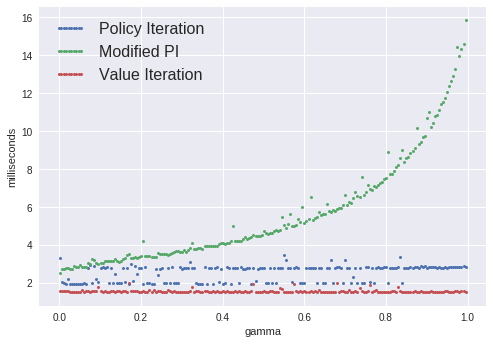

In [0]:
def experiment_4():
  rows = cols = 4
  terminal_states = [0,6,15]
  env = GridWorld(rows, cols, terminal_states, reward_value=-1)
  trials = 10
  samples = 200
  gammas = np.linspace(0.001,1,endpoint=False,num=samples)
  pol_time = np.zeros((trials, samples))
  mod_time = np.zeros((trials, samples))
  val_time = np.zeros((trials, samples))
  
  for t in range(trials):
    for i in range(samples):
      agent = MDPAgent(gammas[i])
      _, _, _, pol_time[t,i] = agent.policy_iteration(env.r, env.p, method='exact', initial='uniform')
      _, _, _, mod_time[t,i] = agent.policy_iteration(env.r, env.p, method='modified', initial='uniform')
      _, _, _, val_time[t,i] = agent.value_iteration(env.r, env.p)
  
  # Plot data
  pol_time = np.average(pol_time, axis=0)*1000
  mod_time = np.average(mod_time, axis=0)*1000
  val_time = np.average(val_time, axis=0)*1000
  data = [pol_time, mod_time, val_time]
  names = ["Policy Iteration", "Modified PI", "Value Iteration"]
  multi_plot_data(gammas, data, names, xlabel="gamma")

experiment_4()

In this setup, value iteration computes faster than either policy iteration or modified policy iteration, with modified policy iteration increasing exponentially with gamma. Value iteration is quite robust varying gamma.

### Varying MDP Complexity
Let's see if increasing the model complexity has an large impact on the algorithms

In [0]:
def experiment_5():
  gamma = 0.95
  agent = MDPAgent(gamma)
  terminal_states = [0,6]
  rows = cols = 5
  env = GridWorld(rows, cols, terminal_states, reward_value=-1)
  
  _, _, pol_it, pol_time = agent.policy_iteration(env.r, env.p, method='exact', initial='deterministic')
  _, _, mod_it, mod_time = agent.policy_iteration(env.r, env.p, method='modified', initial='deterministic')
  _, _, val_it, val_time = agent.value_iteration(env.r, env.p)

  print("Policy iteration: {:.4f} seconds, {:.2f} iterations".format(pol_time, pol_it))
  print("Modified policy : {:.4f} seconds, {:.2f} iterations".format(mod_time, mod_it))
  print("Value iteration : {:.4f} seconds, {:.2f} iterations".format(val_time, val_it))

experiment_5()

Policy iteration: 92.0373 seconds, 46441.00 iterations
Modified policy : 307.7097 seconds, 216967.00 iterations
Value iteration : 0.0024 seconds, 7.00 iterations


Increasing the grid size by a single column and row makes computation time explode for Policy Iteration and much worse for Modified Policy Iteration. Quite surprisingly, it's no sweat for Value Iteration. Value Iteration converges a fraction of a second, compared to 307 in the case of modified policy iteration. It only required 7 iterations compared to 216,967 for modified policy. Outstanding!

